In [1]:
import pandas as pd
import numpy as np
import PIL
import torch, torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
from dataset import defectDataset_convolution
import torch.nn.functional as F
import torch.nn as nn
import time
from PIL import Image, ImageOps
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [3]:
img = Image.open('/home/rliu/TDD-Net/data/' + '%06.0f.jpg' % 6900)
# img = Image.open('/home/rliu/data/pos.jpg')
img = img.convert('L')
img = torchvision.transforms.functional.resize(img, (4064,4064), interpolation=2)
img = ImageOps.expand(img, border=112, fill=0)
toTensor = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.3019], std=[0.1909])]) # toTensor
img_tensor = toTensor(img)
img_tensor = img_tensor.unsqueeze(0).cuda()
# img_tensor = torch.nn.functional.interpolate(img_tensor, size=4288, mode='bilinear').cuda()

In [4]:
img_tensor.shape

torch.Size([1, 1, 4288, 4288])

In [5]:
img_tensor.shape

torch.Size([1, 1, 4288, 4288])

In [6]:
# model_uniform = torch.load('/home/rliu/TDD-Net/models/python/res34-150epo_uniform_07-12-19-hpcc/res34-150epo_uniform_07-12-19_hpcc.model')
# model_uniform.eval();
# model_uniform.cuda();
model_hard = torch.load('/home/rliu/TDD-Net/models/python/res34-150epo_hard_07-12-19-hpcc/res34-150epo_hard_07-12-19_hpcc.model')
model_hard.eval();
model_hard.cuda();

In [7]:
conf_map = model_hard(img_tensor)

In [8]:
# conf_map = conf_map.cpu().detach().numpy()

In [9]:
conf_map.shape

torch.Size([1, 49152])

In [10]:
conf_map = conf_map.reshape(3,128,128)

In [11]:
confidences = F.softmax(conf_map, dim=0)

In [12]:
confidences = confidences.cpu().detach().numpy()

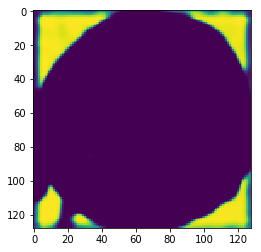

In [13]:
plt.imshow(confidences[0])

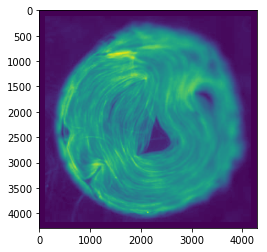

In [14]:
plt.imshow(img_tensor.cpu().numpy()[0,0])

In [15]:
img_tensor.cpu().numpy()[0,0].shape

(4288, 4288)

In [17]:
confidences.shape

(3, 128, 128)